# Métodos de Newton-Raphson y Secante
## ¿Cuál es la ventaja del método de la Secante y Newton-Raphson en comparación a los vistos anteriormente?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def bisection(f, a, b, tol=1e-10):
    fa = f(a)
    fb = f(b)
    x = []
    
    # Just checking if the sign is not negative => not root  necessarily 
    if np.sign(f(a)*f(b)) >= 0:
        print('f(a)f(b)<0 not satisfied!')
        return None

    while (b-a) / 2 > tol:
        c = (a + b) / 2.
        x.append(c)
        fc = f(c)
        if fc == 0:
            break
        elif np.sign(fa*fc) < 0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc
        
    return np.array(x)

In [3]:
def fpi(g, x0, n, tol=1e-10):
    x = np.empty(n+1)
    x[0] = x0
    for i in range(n):
        x[i+1] = g(x[i])
        if np.abs(x[i+1] - x[i]) < tol:
            x = x[:i+2]
            break
        
    return x

In [4]:
def newton_raphson(f, fp, x0, n, m=1, tol=1e-10):
    x = np.empty(n + 1)
    x[0] = x0
    for i in range(n):
        x[i+1] = x[i] - m * f(x[i]) / fp(x[i])
        if np.abs(x[i+1] - x[i]) < tol or f(x[i+1]) == 0:
            x = x[:i+2]
            break
    return x

In [5]:
def secant(f, x0, x1, n, tol=1e-10):
    x = np.empty(n + 2)
    x[0] = x0
    x[1] = x1
    for i in range(1, n + 1):
        x[i+1] = x[i] - (f(x[i]) * (x[i] - x[i-1])) / (f(x[i]) - f(x[i-1]))
        if np.abs(x[i+1] - x[i]) < tol:
            x = x[:i+2]
            break
    return x

# Ejemplo

Encontrar una raíz de la ecuación:
\begin{equation}
    f(x) = x^2-x-1
\end{equation}

Sabemos que sus raíces son:
\begin{equation}
    x = \frac{1\pm\sqrt{5}}{2}
\end{equation}

In [6]:
f = lambda x: x ** 2 - x - 1

Utilizamos los distintos algoritmos.

## Newton-Raphson

In [7]:
x0 = 1
n = 15
fp = lambda x: 2 * x - 1

In [8]:
x_n = newton_raphson(f, fp, x0, n)

In [9]:
print(x_n.shape, x_n[-1], f(x_n[-1]))

(7,) 1.618033988749895 0.0


## Secante

In [10]:
x0 = 1
x1 = 1.5
n = 30

In [11]:
x_s = secant(f, x0, x1, n)

In [12]:
print(x_s.shape, x_s[-1], f(x_s[-1]))

(8,) 1.6180339887498947 -2.220446049250313e-16


## Bisección

In [13]:
a = 1
b = 2

In [14]:
x_b = bisection(f, a, b, tol=1e-16)

In [15]:
print(x_b.shape, x_b[-1], f(x_b[-1]))

(49,) 1.618033988749895 0.0


## IPF

In [16]:
# Funciones para x=g(x)
g1 = lambda x: 1 + 1 / x
g2 = lambda x: 1 / (x - 1)
g3 = lambda x: 1/2 *(x + 1/x + 1)

In [17]:
x0 = 1
n = 50

In [18]:
x_f = fpi(g1, x0, n, tol=1e-10)

In [19]:
print(x_f.shape, x_f[-1], f(x_f[-1]))

(27,) 1.618033988738303 -2.591993286671368e-11


# Análisis

Error conociendo la raíz:

\begin{equation}
    e = |x - r|
\end{equation}

In [20]:
error = lambda x, r: np.abs(r - x)

Aproximación de la tasa de convergencia para el exponente $a$.

\begin{equation}
    tasa \approx \frac{|x_{i+1} - x_i|}{|x_i - x_{i-1}|^a}
\end{equation}

In [21]:
# Utilizando el exponente correspondiente
conv_a = lambda x, a: error(x[1:-1], x[2:]) / error(x[:-2], x[1:-1]) ** a

Tasa conociendo $r$:

\begin{equation}
    tasa \approx \frac{|r - x_{i+1}|}{|r - x_i|^a}
\end{equation}

In [22]:
conv_t = lambda x, r, e: error(x[1:], r) / error(x[:-1], r) ** e

## Convergencia

Aproximación del error 

In [23]:
conv_b = conv_a(x_b, 0)
conv_f = conv_a(x_f, 0)
conv_n = conv_a(x_n, 0)
conv_s = conv_a(x_s, 0)

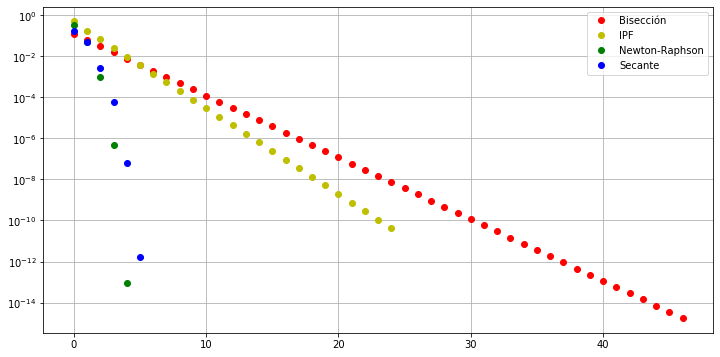

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(conv_b, 'ro', label="Bisección")
plt.plot(conv_f, 'yo', label="IPF")
plt.plot(conv_n, 'go', label="Newton-Raphson")
plt.plot(conv_s, 'bo', label="Secante")
plt.grid(True)
plt.legend()
plt.yscale('log')
plt.show()

## Aproximación tasa de convergencia

Calcular la tasa de convergencia según el método. Recordar:
- Lineal con tasa $S$ para Bisección e IPF
- Super-lineal para Secante.
- Cuadrática con tasa $M$ para Newton-Rapshon.

In [25]:
conve_b = conv_a(x_b, 1) 
conve_f = conv_a(x_f, 1)
conve_n = conv_a(x_n, 2)
conve_s = conv_a(x_s, (1 + np.sqrt(5)) / 2)

Tabla para analizar los valores

In [26]:
def table(approx, conv, conve, a):
    print("i \t x_{i} \t\t\t x_{i+1} \t\t |x_{i+1}-x_{i}| \t e_{i+1}/e_{i}^" + str(a))
    print("%d \t %.16f \t %.16f \t %.16f" % (0, approx[0], approx[1], error(approx[0], approx[1])))
    for i, (xip1, xi, c, ce) in enumerate(zip(approx[1:-1], approx[2:], conv, conve)):
        print("%d \t %.16f \t %.16f \t %.16f \t %.16f" % (i+1, xip1, xi, c, ce))

### Bisección

In [27]:
table(x_b, conv_b, conve_b, a)

i 	 x_{i} 			 x_{i+1} 		 |x_{i+1}-x_{i}| 	 e_{i+1}/e_{i}^1
0 	 1.5000000000000000 	 1.7500000000000000 	 0.2500000000000000
1 	 1.7500000000000000 	 1.6250000000000000 	 0.1250000000000000 	 0.5000000000000000
2 	 1.6250000000000000 	 1.5625000000000000 	 0.0625000000000000 	 0.5000000000000000
3 	 1.5625000000000000 	 1.5937500000000000 	 0.0312500000000000 	 0.5000000000000000
4 	 1.5937500000000000 	 1.6093750000000000 	 0.0156250000000000 	 0.5000000000000000
5 	 1.6093750000000000 	 1.6171875000000000 	 0.0078125000000000 	 0.5000000000000000
6 	 1.6171875000000000 	 1.6210937500000000 	 0.0039062500000000 	 0.5000000000000000
7 	 1.6210937500000000 	 1.6191406250000000 	 0.0019531250000000 	 0.5000000000000000
8 	 1.6191406250000000 	 1.6181640625000000 	 0.0009765625000000 	 0.5000000000000000
9 	 1.6181640625000000 	 1.6176757812500000 	 0.0004882812500000 	 0.5000000000000000
10 	 1.6176757812500000 	 1.6179199218750000 	 0.0002441406250000 	 0.5000000000000000
11 	 1.61791992

### IPF

In [28]:
table(x_f, conv_f, conve_f, 1)

i 	 x_{i} 			 x_{i+1} 		 |x_{i+1}-x_{i}| 	 e_{i+1}/e_{i}^1
0 	 1.0000000000000000 	 2.0000000000000000 	 1.0000000000000000
1 	 2.0000000000000000 	 1.5000000000000000 	 0.5000000000000000 	 0.5000000000000000
2 	 1.5000000000000000 	 1.6666666666666665 	 0.1666666666666665 	 0.3333333333333330
3 	 1.6666666666666665 	 1.6000000000000001 	 0.0666666666666664 	 0.3999999999999989
4 	 1.6000000000000001 	 1.6250000000000000 	 0.0249999999999999 	 0.3750000000000000
5 	 1.6250000000000000 	 1.6153846153846154 	 0.0096153846153846 	 0.3846153846153846
6 	 1.6153846153846154 	 1.6190476190476191 	 0.0036630036630036 	 0.3809523809523809
7 	 1.6190476190476191 	 1.6176470588235294 	 0.0014005602240896 	 0.3823529411764706
8 	 1.6176470588235294 	 1.6181818181818182 	 0.0005347593582887 	 0.3818181818181530
9 	 1.6181818181818182 	 1.6179775280898876 	 0.0002042900919306 	 0.3820224719101963
10 	 1.6179775280898876 	 1.6180555555555556 	 0.0000780274656680 	 0.3819444444447312
11 	 1.61805555

### Secante

In [29]:
table(x_s, conv_s, conve_s, (1+np.sqrt(5))/2)

i 	 x_{i} 			 x_{i+1} 		 |x_{i+1}-x_{i}| 	 e_{i+1}/e_{i}^1.618033988749895
0 	 1.0000000000000000 	 1.5000000000000000 	 0.5000000000000000
1 	 1.5000000000000000 	 1.6666666666666667 	 0.1666666666666667 	 0.5115940846088300
2 	 1.6666666666666667 	 1.6153846153846154 	 0.0512820512820513 	 0.9311948386620529
3 	 1.6153846153846154 	 1.6179775280898876 	 0.0025929127052722 	 0.3170353894921610
4 	 1.6179775280898876 	 1.6180340557275543 	 0.0000565276376667 	 0.8646491584172478
5 	 1.6180340557275543 	 1.6180339887482036 	 0.0000000669793507 	 0.4999508090467787
6 	 1.6180339887482036 	 1.6180339887498947 	 0.0000000000016911 	 0.6855491046247754


### Newton-Raphson

In [30]:
table(x_n, conv_n, conve_n, 2)

i 	 x_{i} 			 x_{i+1} 		 |x_{i+1}-x_{i}| 	 e_{i+1}/e_{i}^2
0 	 1.0000000000000000 	 2.0000000000000000 	 1.0000000000000000
1 	 2.0000000000000000 	 1.6666666666666667 	 0.3333333333333333 	 0.3333333333333333
2 	 1.6666666666666667 	 1.6190476190476191 	 0.0476190476190477 	 0.4285714285714292
3 	 1.6190476190476191 	 1.6180344478216819 	 0.0010131712259371 	 0.4468085106382766
4 	 1.6180344478216819 	 1.6180339887499890 	 0.0000004590716929 	 0.4472134119832668
5 	 1.6180339887499890 	 1.6180339887498949 	 0.0000000000000941 	 0.4467299333062025


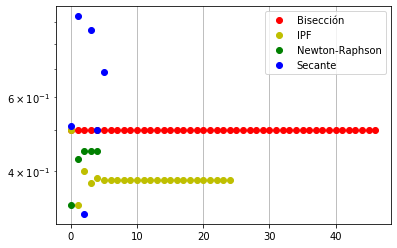

In [31]:
plt.plot(conve_b, 'ro', label="Bisección")
plt.plot(conve_f, 'yo', label="IPF")
plt.plot(conve_n, 'go', label="Newton-Raphson")
plt.plot(conve_s, 'bo', label="Secante")
plt.grid(True)
plt.legend()
plt.yscale('log')
plt.show()

Estos valores aproximan $S$ y $M$ según corresponda.

## Convergencia "teórica"

Utilizando el valor real de la raíz.

In [32]:
r = (1 + np.sqrt(5)) / 2
convt_b = conv_t(x_b, r, 1)
convt_f = conv_t(x_f, r, 1)
convt_n = conv_t(x_n, r, 2)
convt_s = conv_t(x_s, r, (1 + np.sqrt(5)) / 2)

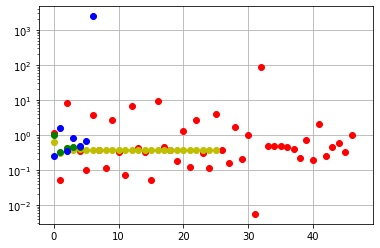

In [33]:
plt.plot(convt_b, 'ro', label="Bisección")
plt.plot(convt_f, 'yo', label="IPF")
plt.plot(convt_n, 'go', label="Newton-Raphson")
plt.plot(convt_s, 'bo', label="Secante")
plt.grid(True)
plt.legend
plt.yscale('log')
plt.show()

Acá se obtienen los $S$ y $M$ 'reales'.

## Error

In [34]:
r = (1 + np.sqrt(5)) / 2
err_b = error(x_b, r)
err_f = error(x_f, r)
err_n = error(x_n, r)
err_s = error(x_s, r)

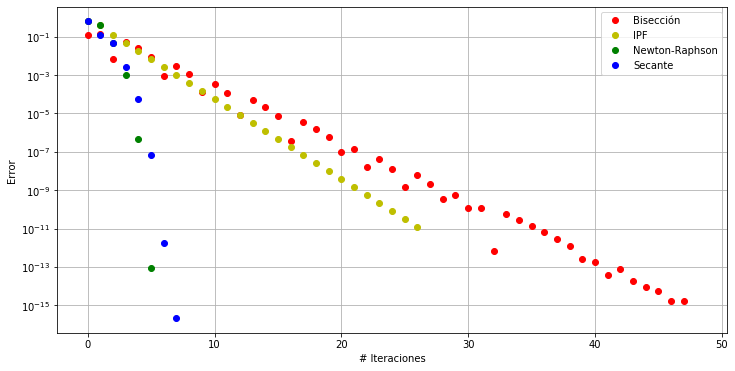

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(err_b, 'ro', label="Bisección")
plt.plot(err_f, 'yo', label="IPF")
plt.plot(err_n, 'go', label="Newton-Raphson")
plt.plot(err_s, 'bo', label="Secante")
plt.grid(True)
plt.legend()
plt.xlabel("# Iteraciones")
plt.ylabel("Error")
plt.yscale('log')
plt.show()

## Conclusión

El método de Newton-Raphson y el de la secante converge a la solución utilizando un menor número de iteraciones.

## 'Problema' de Newton-Raphson

Raíces con multiplicidad $m$.

In [36]:
f2 = lambda x: x ** 2

In [37]:
x0 = 1
n = 20
f2p = lambda x: 2 * x

In [38]:
x_n2 = newton_raphson(f2, f2p, x0, n)

In [39]:
print(x_n2[-1], f2(x_n2[-1]))

9.5367431640625e-07 9.094947017729282e-13


In [40]:
x0 = 1
x1 = 1.1
n = 20

In [41]:
x_s2 = secant(f2, x0, x1, n)

In [42]:
print(x_s2[-1], f2(x_s2[-1]))

5.982324949014275e-05 3.5788211795598648e-09


In [43]:
r = 0
err_n2 = error(x_n2, r)
err_s2 = error(x_s2, r)

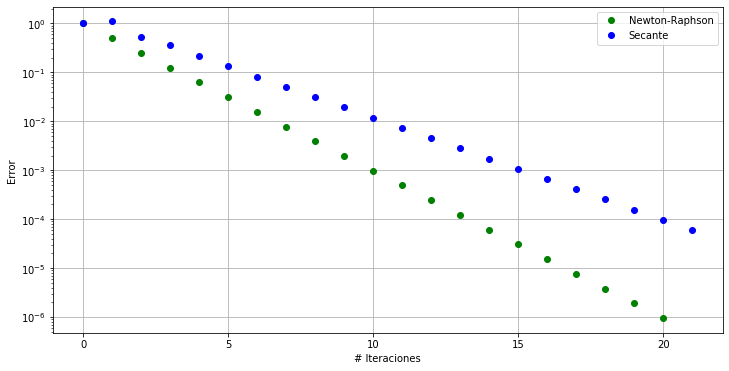

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(err_n2, 'go', label="Newton-Raphson")
plt.plot(err_s2, 'bo', label="Secante")
plt.grid(True)
plt.legend()
plt.xlabel("# Iteraciones")
plt.ylabel("Error")
plt.yscale('log')
plt.show()

El problema es que para este tipo de problemas se obtiene convergencia lineal. Se puede corregir con *Newton-Raphson* modificado.

## Utilizando $m$ para Newton-Raphson

In [45]:
n = 5
x0 = 1.1
x_n2_m = newton_raphson(f2, f2p, x0, n, 2)

In [46]:
x_n2_m

array([1.1, 0. ])

In [47]:
r = 0
err_n2_m = error(x_n2_m, r)

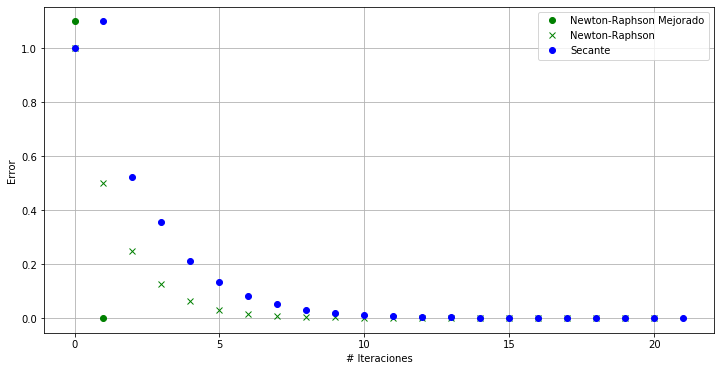

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(err_n2_m, 'go', label="Newton-Raphson Mejorado")
plt.plot(err_n2, 'gx', label="Newton-Raphson")
plt.plot(err_s2, 'bo', label="Secante")
plt.grid(True)
plt.legend()
plt.xlabel("# Iteraciones")
plt.ylabel("Error")
plt.show()

Se alcanzó la solución en una interación!

## Otro ejemplo

\begin{equation}
    f(x) = 0.5 x\cos(x)
\end{equation}

In [49]:
f3 = lambda x: .5 * x * np.cos(x) 

In [50]:
x = np.linspace(-10, 10, 100)

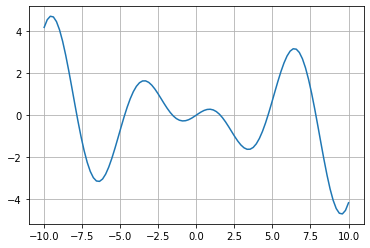

In [51]:
plt.plot(x, f3(x))
plt.grid(True)
plt.show()

In [52]:
x0 = -5
x1 = -4
n = 20
xx_s = secant(f3, x0, x1, n)

In [53]:
print(xx_s.shape, xx_s[-1], f3(xx_s[-1]))

(8,) -4.71238898038469 4.3282590608740267e-16


In [54]:
x0 = 1
n = 20
f3p = lambda x: .5 * np.cos(x) - .5 * x * np.sin(x)
xx_n = newton_raphson(f3, f3p, x0, n)

In [55]:
print(xx_n.shape, xx_n[-1], f3(xx_n[-1]))

(8,) 1.5707963267948966 4.8091767343044744e-17


# Referencias

* Sauer, T. (2006). Numerical Analysis Pearson Addison Wesley.
* https://github.com/tclaudioe/Scientific-Computing/tree/master/SC1